<a href="https://colab.research.google.com/github/KalyaniTBhandwalkar/Assignment/blob/main/zomato_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36084 sha256=1b5c0194950af6a1b80255eeca20bbcc679715d6d4c90a210b8fa2ef7c94625d
  Stored in directory: /root/.cache/pip/wheels/32/ab/d9/78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built nsepy


In [ ]:
import nsepy
from nsepy import get_history
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from datetime import date, timedelta
import warnings
warnings.filterwarnings("ignore")

In [ ]:
today=date.today()
data = get_history(symbol="ZOMATO",
                        start=today - timedelta(days=2*365),
                        end=today
#                       index_col='Date',parse_dates=True
                       )

In [ ]:
today - timedelta(days=3*365)

datetime.date(2019, 8, 13)

In [ ]:
from datetime import date

x=date.today()
x

datetime.date(2022, 8, 12)

In [ ]:
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2022-08-04,ZOMATO,EQ,55.45,55.75,58.65,54.50,56.80,57.85,56.75,420183405,2.384730e+15,526837,103424932,0.2461
2022-08-05,ZOMATO,EQ,57.85,57.90,59.15,53.25,55.00,54.60,56.75,315019033,1.787742e+15,446431,85429025,0.2712
2022-08-08,ZOMATO,EQ,54.60,54.70,56.20,54.20,55.55,55.45,55.30,178185076,9.854513e+14,268717,50287328,0.2822
2022-08-10,ZOMATO,EQ,55.45,56.20,56.55,54.50,56.00,55.95,55.47,200699912,1.113321e+15,237333,81610785,0.4066
2022-08-11,ZOMATO,EQ,55.95,56.90,58.15,56.35,57.95,57.90,57.57,130942734,7.537821e+14,172279,49107610,0.3750


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 2021-07-23 to 2022-08-11
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              263 non-null    object 
 1   Series              263 non-null    object 
 2   Prev Close          263 non-null    float64
 3   Open                263 non-null    float64
 4   High                263 non-null    float64
 5   Low                 263 non-null    float64
 6   Last                263 non-null    float64
 7   Close               263 non-null    float64
 8   VWAP                263 non-null    float64
 9   Volume              263 non-null    object 
 10  Turnover            263 non-null    float64
 11  Trades              263 non-null    object 
 12  Deliverable Volume  263 non-null    object 
 13  %Deliverble         263 non-null    float64
dtypes: float64(9), object(5)
memory usage: 30.8+ KB


In [ ]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Turnover,%Deliverble
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,2.630000e+02,263.000000
mean,102.957224,103.477376,105.780418,100.485171,102.885361,102.888403,103.030608,4.944275e+14,0.334006
std,35.127649,35.318778,35.925271,34.456644,35.181267,35.198324,35.206187,7.698227e+14,0.133159
min,41.650000,40.850000,44.400000,40.600000,41.600000,41.650000,43.290000,5.375542e+13,0.079300
25%,70.775000,71.375000,72.050000,68.850000,69.950000,70.350000,70.280000,1.554047e+14,0.240950
50%,94.200000,95.100000,97.850000,93.000000,94.600000,94.200000,94.340000,2.594185e+14,0.324800
75%,136.375000,136.875000,139.050000,133.150000,136.475000,136.375000,136.490000,5.262518e+14,0.416750
max,160.300000,161.150000,169.000000,154.250000,161.200000,160.300000,161.420000,8.625275e+15,0.685400


In [ ]:
data.nunique()

Symbol                  1
Series                  1
Prev Close            238
Open                  221
High                  227
Low                   221
Last                  234
Close                 238
VWAP                  255
Volume                263
Turnover              263
Trades                263
Deliverable Volume    263
%Deliverble           255
dtype: int64

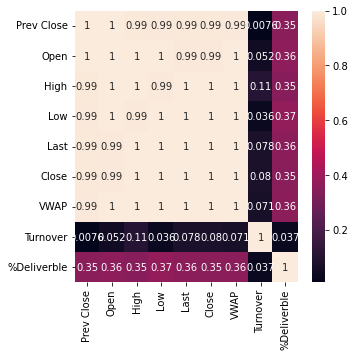

In [ ]:
corr_matrix = data.corr().abs()
plt.figure(figsize=(5,5))
ax = sns.heatmap(corr_matrix,annot=True)

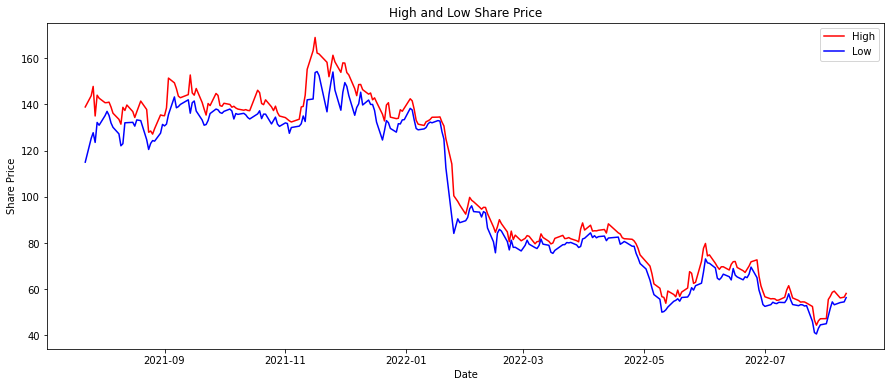

In [ ]:

fig, ax = plt.subplots(figsize=(15,6))
#ax.set_facecolor('#000041')
ax.plot(data['High'], color='red', label='High')
plt.plot(data['Low'], color='blue', label='Low')
plt.gca().set(title='High and Low Share Price', xlabel='Date', ylabel='Share Price')
plt.legend()
plt.show()

In [ ]:
split_fraction = 0.715
train_split = int(split_fraction * int(data.shape[0]))
train_split

188

In [ ]:
#data1=data.drop(labels=['Symbol','Series','Volume','Turnover','%Deliverble','Trades','Deliverable Volume'], axis=1)
data1=data['Close']
train_data=data1.iloc[:train_split-1]
val_data=data1.iloc[train_split:]


In [ ]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_data=train_data.values.reshape(-1, 1)
val_data=val_data.values.reshape(-1, 1)

In [ ]:
Scale=MinMaxScaler()
Scale.fit(train_data)

MinMaxScaler()

In [ ]:
train_data_scale=Scale.transform(train_data)
val_data_scale=Scale.transform(val_data)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 2
n_features = 1

generator = TimeseriesGenerator(train_data_scale, train_data_scale, length=n_input, batch_size=1)
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
# define model


# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()
# fit model
model.fit(generator,epochs=10)

Given the Array: 
[0.593361   0.76704209]
Predict this y: 
 [[0.67516301]]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
185/185 [==============================] - 5s 7ms/step - loss: 0.1259
Epoch 2/10
185/185 [==============================] - 1s 8ms/step - loss: 0.0102
Epoch 3/10
185/185 [==============================] - 3s 15ms/step - loss: 0.0040
Epoch 4/10
185/185 [==============================] - 3s 15ms/step - loss: 0.0035
Epoch 5/10
185/185 [==============================] - 3s 17ms/step - loss: 0.0036
Epoch 6/10
185/185 [====================

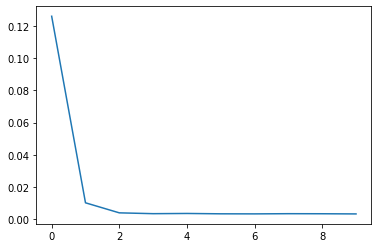

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = train_data_scale[-2:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.06026916]], dtype=float32)

In [ ]:
val_data_scale[0]

array([-0.00118554])

In [ ]:
test_predictions = []

first_eval_batch = train_data_scale[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(val_data)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
val_data=data1.iloc[train_split:]

In [ ]:
#val_data.head()
Result=pd.DataFrame(columns=['Close','Predicted'])
Result['Close']=data['Close'].iloc[train_split:]

In [ ]:
true_predictions = Scale.inverse_transform(test_predictions)
 

In [ ]:

val_data['Predictions'] = true_predictions
Result['Predicted']=true_predictions

In [ ]:
Result.tail()

,Close,Predicted
Date,,
2022-08-04,57.85,87.441973
2022-08-05,54.60,87.445476
2022-08-08,55.45,87.448752
2022-08-10,55.95,87.451821
2022-08-11,57.90,87.454693


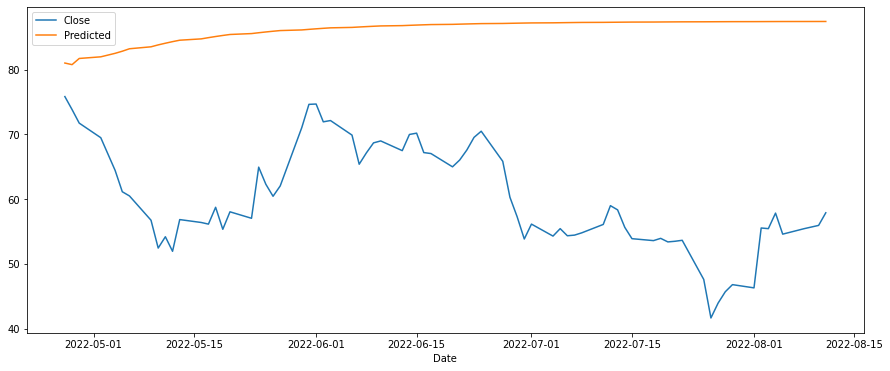

In [ ]:
Result.plot(figsize=(15,6))

In [ ]:
#forecast
forecast_batch = val_data_scale[-2:]
forecast_batch = forecast_batch.reshape((1, n_input, n_features))
forecast_predictions = []

first_forecast_batch = val_data_scale[-n_input:]
current_batch = first_forecast_batch.reshape((1, n_input, n_features))

for i in range(7):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    forecast_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

true_predictions = Scale.inverse_transform(forecast_predictions)

In [ ]:
true_predictions

array([[65.35157429],
       [66.87544549],
       [69.92125224],
       [71.56926528],
       [73.4140848 ],
       [74.77547361],
       [76.06576231]])